## k-최근접 이웃 분류모형

### 관련 라이브러리 호출

In [1]:
# 관련 라이브러리를 호출합니다.
import os
import joblib
import numpy as np
import pandas as pd
from GraphicSetting import *
import hds_stats as hds

### 실습 데이터셋 준비

In [2]:
# 현재 작업 경로를 확인합니다.
os.getcwd()

'/Users/hdsceokevin/Documents/Lectures/Python/MachineLearning/code'

In [3]:
# data 폴더로 작업 경로를 변경합니다.
os.chdir(path = '../data')

In [4]:
# 현재 작업 경로에 있는 폴더명과 파일명을 출력합니다.
os.listdir()

['Used_Cars_Price.z', 'Univ_Admit.z', 'Cereal_Dataset.z']

In [5]:
# 분류모형 실습 데이터셋을 호출합니다.
df = joblib.load(filename = 'Univ_Admit.z')

### 입력변수 행렬과 목표변수 벡터로 분리

In [6]:
# df의 처음 5행을 출력합니다.
df.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,Fail,380.0,3.61,0,0,1,0
1,Pass,660.0,3.67,0,0,1,0
2,Pass,800.0,4.00,1,0,0,0
3,Pass,640.0,3.19,0,0,0,1
4,Fail,520.0,2.93,0,0,0,1


In [7]:
# 목표변수명을 yvar에 할당합니다.
yvar = 'admit'

In [8]:
# 데이터프레임을 입력변수 행렬과 목표변수 벡터로 분리합니다.
X = df.drop(columns = yvar)
y = df[yvar].copy()

### 실습 데이터셋 분할

In [9]:
# 관련 라이브러리를 호출합니다.
from sklearn.model_selection import train_test_split

In [10]:
# 전체 데이터셋의 70%를 훈련셋, 30%를 검증셋으로 분할합니다.
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size = 0.3, random_state = 0, stratify = y
)

### 훈련셋과 검증셋 확인

In [11]:
# 훈련셋 입력변수 행렬의 크기를 확인합니다.
X_train.shape

(1180, 6)

In [12]:
# 검증셋 입력변수 행렬의 크기를 확인합니다.
X_valid.shape

(507, 6)

In [13]:
# 훈련셋 목표변수의 범주별 상대도수를 확인합니다.
y_train.value_counts(normalize = True)

admit
Fail    0.688983
Pass    0.311017
Name: proportion, dtype: float64

In [14]:
# 검증셋 목표변수의 범주별 상대도수를 확인합니다.
y_valid.value_counts(normalize = True)

admit
Fail    0.690335
Pass    0.309665
Name: proportion, dtype: float64

### 데이터 표준화

In [15]:
# 관련 라이브러리를 호출합니다.
from sklearn.preprocessing import StandardScaler

In [16]:
# 데이터 표준화 객체를 생성합니다.
scaler = StandardScaler()

In [17]:
# 훈련셋 입력변수 행렬을 표준화합니다.
X_train = scaler.fit_transform(X = X_train)

In [18]:
# 검증셋 입력변수 행렬을 표준화합니다.
X_valid = scaler.transform(X = X_valid)

### 가중치 없는 분류모형 적합

In [19]:
# 관련 라이브러리를 호출합니다.
from sklearn.neighbors import KNeighborsClassifier

In [20]:
# 가중치 없는 분류모형을 설정합니다.
model = KNeighborsClassifier(
    n_neighbors = 5, 
    weights = 'uniform', 
    metric = 'euclidean'
)

In [21]:
# 훈련셋으로 가중치 없는 분류모형을 적합합니다.
model.fit(X = X_train, y = y_train)

KNeighborsClassifier(metric='euclidean')

In [22]:
# 가중치 없는 분류모형의 파라미터를 확인합니다.
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [23]:
# 가중치 없는 분류모형의 훈련셋 정확도를 확인합니다.
model.score(X = X_train, y = y_train)

0.7779661016949152

In [24]:
# 가중치 없는 분류모형의 검증셋 정확도를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.6844181459566075

### 분류모형 성능 평가

In [25]:
# 가중치 없는 분류모형의 검증셋 추정확률을 생성합니다.
y_vprob1 = model.predict_proba(X = X_valid)

array([[0.6, 0.4],
       [0.8, 0.2],
       [0.4, 0.6],
       ...,
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8]])

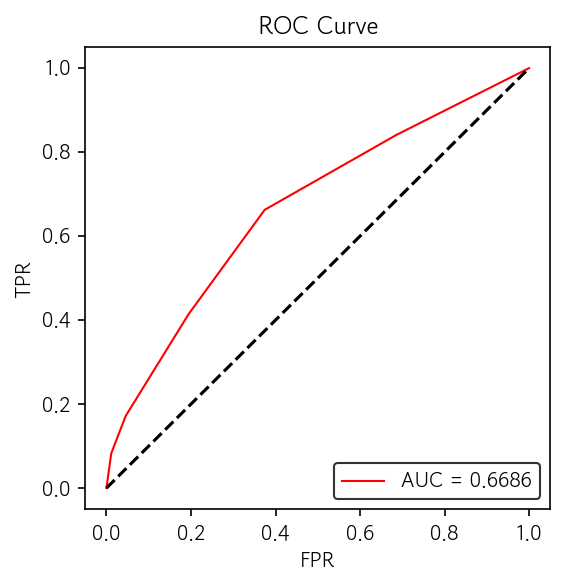

In [26]:
# 가중치 없는 분류모형의 ROC 곡선을 그립니다.
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob1, color = 'red')

In [27]:
# 가중치 없는 분류모형의 검증셋 추정값을 생성합니다.
y_vpred1 = model.predict(X = X_valid)

array(['Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail',
       'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass',
       'Fail', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail',
       'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail',
       'Pass', 'Fail', 'Pass', 'Fail', 'Fail', 'Pass', 'Fail', 'Pass',
       'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass',
       'Fail', 'Fail', 'Pass', 'Fail', 'Pass', 'Pass', 'Fail', 'Pass',
       'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Fail', 'Fail', 'Pass', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail',
       'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Pass', 'Fail', 'Fail',
       'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Fail', 'Fail',
      

In [28]:
# 가중치 없는 분류모형의 혼동행렬 리포트를 출력합니다.
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred1)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,282,92,374
Pass,68,65,133
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7540    0.8057    0.7790       350
        Pass     0.4887    0.4140    0.4483       157

    accuracy                         0.6844       507
   macro avg     0.6214    0.6099    0.6136       507
weighted avg     0.6719    0.6844    0.6766       507



### 가중치 있는 분류모형 적합

In [29]:
# 기존 모형에 가중치 유형을 설정합니다.
model.set_params(weights = 'distance')

KNeighborsClassifier(metric='euclidean', weights='distance')

In [30]:
# 훈련셋으로 가중치 있는 분류모형을 적합합니다.
model.fit(X = X_train, y = y_train)

KNeighborsClassifier(metric='euclidean', weights='distance')

In [31]:
# 가중치 있는 분류모형의 훈련셋 정확도를 확인합니다.
model.score(X = X_train, y = y_train)

0.8983050847457628

In [32]:
# 가중치 있는 분류모형의 검증셋 정확도를 확인합니다.
model.score(X = X_valid, y = y_valid)

0.7238658777120316

### 분류모형 성능 평가

In [33]:
# 가중치 있는 분류모형의 검증셋 추정확률을 생성합니다.
y_vprob2 = model.predict_proba(X = X_valid)

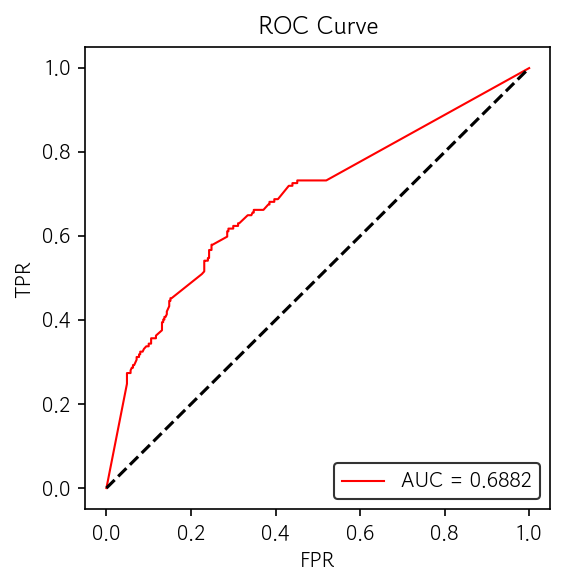

In [34]:
# 가중치 있는 분류모형의 ROC 곡선을 그립니다.
hds.stat.roc_curve(y_true = y_valid, y_prob = y_vprob2, color = 'red')

In [35]:
# 가중치 있는 분류모형의 검증셋 추정값을 생성합니다.
y_vpred2 = model.predict(X = X_valid)

In [36]:
# 가중치 있는 분류모형의 혼동행렬 리포트를 출력합니다.
hds.stat.clfmetrics(y_true = y_valid, y_pred = y_vpred2)

▶ Confusion Matrix


Real,Fail,Pass,All
Pred,,,
Fail,296,86,382
Pass,54,71,125
All,350,157,507



▶ Classification Report
              precision    recall  f1-score   support

        Fail     0.7749    0.8457    0.8087       350
        Pass     0.5680    0.4522    0.5035       157

    accuracy                         0.7239       507
   macro avg     0.6714    0.6490    0.6561       507
weighted avg     0.7108    0.7239    0.7142       507



### 최적의 이웃 개수(k) 탐색

In [37]:
# k의 범위를 설정합니다.
ks = range(1, 101)

In [38]:
# 검증셋 결정계수를 저장할 빈 리스트를 생성합니다.
valid_score = []

In [39]:
# 반복문으로 k를 바꿔가면서 검증셋 결정계수를 리스트에 추가합니다.
for k in ks:
    model.set_params(n_neighbors = k)
    model.fit(X = X_train, y = y_train)
    valid_score.append(model.score(X = X_valid, y = y_valid))

### 최적의 이웃 개수(k) 탐색 결과 시각화

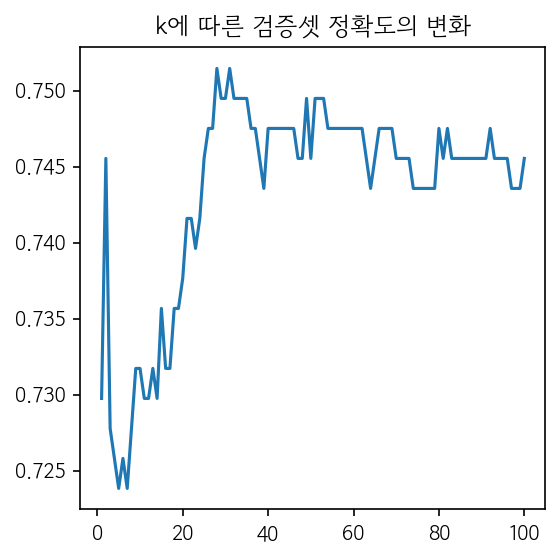

In [40]:
# 검증셋 정확도로 선 그래프를 그립니다.
sns.lineplot(x = ks, y = valid_score)
plt.title(label = 'k에 따른 검증셋 정확도의 변화');

In [41]:
# 검증셋 정확도가 최댓값일 때의 k를 확인합니다.
ks[np.argmax(a = valid_score)]

28

In [42]:
# 검증셋 정확도의 최댓값을 확인합니다.
np.max(a = valid_score)

0.7514792899408284

## End of Document